In [1]:
import pandas as pd
import warnings
import numpy as np
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import datetime

In [2]:
df_2017_winter = pd.read_csv("2017_winter.csv" ,low_memory=False, encoding = 'ISO-8859-1' )
df_2017_summer = pd.read_csv("2017_summer.csv" ,low_memory=False, encoding = 'ISO-8859-1' )
df_2018_winter = pd.read_csv("2018_winter.csv" ,low_memory=False, encoding = 'ISO-8859-1' )
df_2018_summer = pd.read_csv("2018_summer.csv" ,low_memory=False, encoding = 'ISO-8859-1' )

In [3]:
df_2017_winter.head(5)

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,tip_amount
0,2017-12-09 11:14:24,2017-12-09 11:41:01,3.35,90,2.00
1,2017-12-22 21:47:10,2017-12-22 21:53:45,1.63,166,0.00
2,2017-12-09 14:56:10,2017-12-09 14:58:38,0.63,24,0.72
3,2017-12-29 23:29:48,2017-12-29 23:34:25,0.76,142,0.00
4,2017-12-02 13:57:34,2017-12-02 14:00:24,0.50,43,1.00


In [4]:
print(df_2017_winter.isnull().values.any())
print(df_2017_summer.isnull().values.any())
print(df_2018_winter.isnull().values.any())
print(df_2018_summer.isnull().values.any())

False
False
False
False


In [5]:
df_2017_winter = df_2017_winter[(df_2017_winter != 0).all(1)]
df_2017_summer = df_2017_summer[(df_2017_summer != 0).all(1)]
df_2018_winter = df_2018_winter[(df_2018_winter != 0).all(1)]
df_2018_summer = df_2018_summer[(df_2018_summer != 0).all(1)]

a = 0
a += df_2017_winter.shape[0]
a += df_2017_summer.shape[0]
a += df_2018_winter.shape[0]
a += df_2018_summer.shape[0]
a


19946

In [6]:
#calculating speed km/h and add pick up hour column

def get_summary_df(df):
    
    #convert data type
    df['tpep_pickup_datetime']  = pd.to_datetime(df['tpep_pickup_datetime'])
    df['tpep_dropoff_datetime']  = pd.to_datetime(df['tpep_dropoff_datetime'])
    df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']

    df['duration_seconds'] = df['duration']// datetime.timedelta(seconds=1)

#miles to km
    df['trip_distance_km'] = df['trip_distance'] * 1.609344

#km per hour
    df['avg_speed'] = (df['trip_distance_km']/df['duration_seconds']) * 60 * 60


    df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
    
    df['tpep_pickup_datetime']  = pd.to_datetime(df['tpep_pickup_datetime']).dt.date
    df = df.rename(columns={"tpep_pickup_datetime": "Pickup_Date"})
    return df.loc[:, ['Pickup_Date', 'trip_distance_km', 'duration_seconds', 'avg_speed', 'pickup_hour', 'PULocationID','tip_amount']]


In [7]:
weather_17_df =  pd.read_csv("daily weather 2017.csv" ,low_memory=False, encoding = 'ISO-8859-1' )

weather_17_df = weather_17_df.loc[:, ['Date time', 'Minimum Temperature', 'Maximum Temperature', 'Temperature']]

#converting date format to match taxi data
date_ls = []
format_str = '%m/%d/%Y'
for date_str in weather_17_df["Date time"]: 
    date_ls.append(datetime.datetime.strptime(date_str, format_str).strftime("%Y-%m-%d"))
    
weather_17_df["Date time"] = date_ls
weather_17_df = weather_17_df.rename(columns={"Date time": "Date"})

#converting from Fahrenheit to Celsius
weather_17_df['Temperature'] = round((weather_17_df['Temperature'] - 32)/1.8, 2)
weather_17_df['Minimum Temperature'] = round((weather_17_df['Minimum Temperature'] - 32)/1.8, 2)
weather_17_df['Maximum Temperature'] = round((weather_17_df['Maximum Temperature'] - 32)/1.8, 2)

weather_17_df.to_csv(r'C:\Users\alish\Desktop\Ads Project2\weather_summary_2017.csv', index = False)

In [8]:
weather_18_df =  pd.read_csv("daily weather 2018.csv" ,low_memory=False, encoding = 'ISO-8859-1' )
weather_18_df = weather_18_df.loc[:, ['Date time', 'Minimum Temperature', 'Maximum Temperature', 'Temperature']]

#converting date format to match taxi data
date_ls = []
format_str = '%m/%d/%Y'
for date_str in weather_18_df["Date time"]: 
    date_ls.append(datetime.datetime.strptime(date_str, format_str).strftime("%Y-%m-%d"))
    
weather_18_df["Date time"] = date_ls
weather_18_df = weather_18_df.rename(columns={"Date time": "Date"})

#converting from Fahrenheit to Celsius
weather_18_df['Temperature'] = round((weather_18_df['Temperature'] - 32)/1.8, 2)
weather_18_df['Minimum Temperature'] = round((weather_18_df['Minimum Temperature'] - 32)/1.8, 2)
weather_18_df['Maximum Temperature'] = round((weather_18_df['Maximum Temperature'] - 32)/1.8, 2)

weather_18_df.to_csv(r'C:\Users\alish\Desktop\Ads Project2\weather_summary_2018.csv', index = False)

In [9]:
temp_2017_summer = get_summary_df(df_2017_summer).sort_values(by=['Pickup_Date'])
temp_2017_winter = get_summary_df(df_2017_winter).sort_values(by=['Pickup_Date'])
temp_2018_summer = get_summary_df(df_2018_summer).sort_values(by=['Pickup_Date'])
temp_2018_winter = get_summary_df(df_2018_winter).sort_values(by=['Pickup_Date'])

In [10]:
weather_17_df['Date'] = pd.to_datetime(weather_17_df['Date'])
weather_18_df['Date'] = pd.to_datetime(weather_18_df['Date'])

temp_2017_summer['Pickup_Date'] = pd.to_datetime(temp_2017_summer['Pickup_Date'])
temp_2017_winter['Pickup_Date'] = pd.to_datetime(temp_2017_winter['Pickup_Date'])
temp_2018_summer['Pickup_Date'] = pd.to_datetime(temp_2018_summer['Pickup_Date'])
temp_2018_winter['Pickup_Date'] = pd.to_datetime(temp_2018_winter['Pickup_Date'])


summary_2017_summer = pd.merge(temp_2017_summer, weather_17_df, left_on = 'Pickup_Date', right_on = 'Date').drop('Date', axis=1)
summary_2017_winter = pd.merge(temp_2017_winter, weather_17_df, left_on = 'Pickup_Date', right_on = 'Date').drop('Date', axis=1)
summary_2018_summer = pd.merge(temp_2018_summer, weather_18_df, left_on = 'Pickup_Date', right_on = 'Date').drop('Date', axis=1)
summary_2018_winter = pd.merge(temp_2018_winter, weather_18_df, left_on = 'Pickup_Date', right_on = 'Date').drop('Date', axis=1)


summary_2017_summer = summary_2017_summer.loc[:, ['Pickup_Date','trip_distance_km', 'duration_seconds','avg_speed','pickup_hour','Minimum Temperature','Maximum Temperature','Temperature','tip_amount','PULocationID']]
summary_2017_winter = summary_2017_winter.loc[:, ['Pickup_Date','trip_distance_km', 'duration_seconds','avg_speed','pickup_hour','Minimum Temperature','Maximum Temperature','Temperature','tip_amount','PULocationID']]
summary_2018_summer = summary_2018_summer.loc[:, ['Pickup_Date','trip_distance_km', 'duration_seconds','avg_speed','pickup_hour','Minimum Temperature','Maximum Temperature','Temperature','tip_amount','PULocationID']]
summary_2018_winter = summary_2018_winter.loc[:, ['Pickup_Date','trip_distance_km', 'duration_seconds','avg_speed','pickup_hour','Minimum Temperature','Maximum Temperature','Temperature','tip_amount','PULocationID']]



In [11]:
#checking and deleting outliers: 621, 2855, 3031; 889;1300, 4143, 2797, 3434
summary_2017_summer = summary_2017_summer.drop([621, 2855, 3031])
summary_2017_winter = summary_2017_winter.drop([889])
summary_2018_summer = summary_2018_summer.drop ([1300, 4143, 2797, 3434])
summary_2018_winter = summary_2018_winter.drop([3804])

In [12]:
summary_2017_summer.to_csv(r'C:\Users\alish\Desktop\Ads Project2\summary_2017_summer.csv', index = False)
summary_2017_winter.to_csv(r'C:\Users\alish\Desktop\Ads Project2\summary_2017_winter.csv', index = False)
summary_2018_summer.to_csv(r'C:\Users\alish\Desktop\Ads Project2\summary_2018_summer.csv', index = False)
summary_2018_winter.to_csv(r'C:\Users\alish\Desktop\Ads Project2\summary_2018_winter.csv', index = False)

In [13]:
attrs = ['avg_speed','pickup_hour','Minimum Temperature','Maximum Temperature','Temperature', 'tip_amount']
summary_2017_summer.loc[:,attrs].to_csv(r'C:\Users\alish\Desktop\Ads Project2\final_2017_summer.csv', index = False)
summary_2017_winter.loc[:,attrs].to_csv(r'C:\Users\alish\Desktop\Ads Project2\final_2017_winter.csv', index = False)
summary_2018_winter.loc[:,attrs].to_csv(r'C:\Users\alish\Desktop\Ads Project2\final_2018_winter.csv', index = False)
summary_2018_summer.loc[:,attrs].to_csv(r'C:\Users\alish\Desktop\Ads Project2\final_2018_summer.csv', index = False)

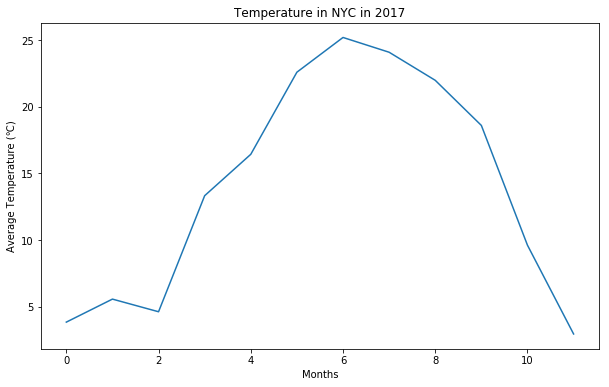

In [14]:
m_weather_17_df =  pd.read_csv("monthly weather 2017.csv" ,low_memory=False, encoding = 'ISO-8859-1' )
m_weather_17_df.head(5)

m_weather_17_df['Temperature'] = round((m_weather_17_df['Temperature'] - 32)/1.8, 2)
m_weather_17_df['Temperature']

fig, ax = plt.subplots(1, figsize=(10, 6))
plt.plot(m_weather_17_df[['Temperature']])
plt.xlabel('Months')
plt.ylabel("Average Temperature (℃)")
plt.title('Temperature in NYC in 2017')
fig.savefig('Monthly Temperature 2017.png', dpi=300)